In [1]:
from negi_stuff.modules.imps import (pd, np, xr, za, mpl, plt, sns, pjoin, os, glob,
                              dt, sys, ucp, log, splot, crt, bok)

Loading BokehJS ...

In [2]:
BT  = 'bottom_top'
SN  = 'south_north'
WE  = 'west_east'
XT  = 'XTIME'
XLA = 'XLAT'
XLO = 'XLONG'
P, V, U, T = 'P','V','U','T'
path='../../data_sample/wrf_out.small.h5'
ds = xr.open_dataset(path)

In [3]:
_slice = {BT:0,SN:10,WE:11}
_da = ds[T]
_da = _da[_slice] + 300

In [4]:
la = ds[_slice][XLA].values
lo = ds[_slice][XLO].values

In [5]:
import cartopy as cy

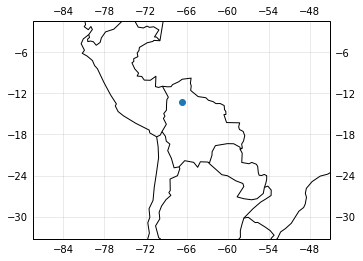

In [6]:
ax = plt.axes(projection=cy.crs.PlateCarree())
ax.set_extent([ds[XLO].min(),
               ds[XLO].max(),
               ds[XLA].min(),
               ds[XLA].max()
              ])
ax.scatter(lo,la)
ax.coastlines()
ax.add_feature(cy.feature.BORDERS);
gl = ax.gridlines(draw_labels=True,color='k',alpha=.1)

In [7]:
_df = _da.to_dataframe()

In [8]:
f = bok.figure_dt()
f.line(source=_df,x='XTIME',y='T')
f.plot_height = 200
bok.show(f)

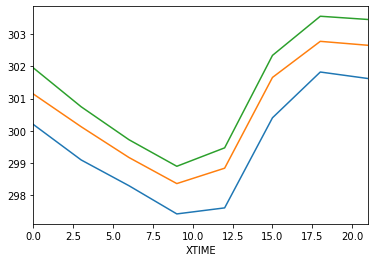

In [26]:
f, ax = plt.subplots()
_group = _df['T'].groupby(_df.index.hour)
qs = [.25,.5,.75]
for q in qs:
    _group.quantile(q).plot(ax=ax, label=q)

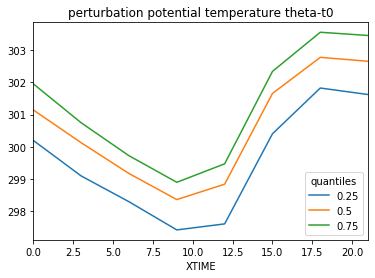

In [27]:
ax.set_title(ds['T'].description)
ax.legend(title='quantiles')
ax.figure

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
_df['secs']=_df.index.astype('int')/1e9

In [30]:
model = LinearRegression()

In [31]:
x = _df['secs'].values.reshape(-1,1)
y = _df['T'   ].values.reshape(-1,1)

In [32]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
_df['x_predict']=model.predict(x).flatten()

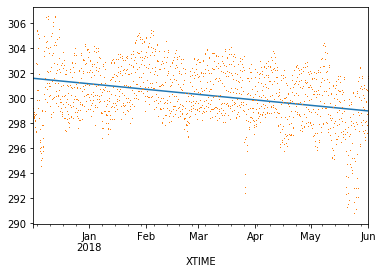

In [34]:
_df['x_predict'].plot()
_df['T'].plot(marker=',',linewidth=0)